# Regression Analysis using Python

This notebook will cover some of the basic ways to perform regression analysis on a dataframe to predict a continuous variable

Tools and libraries used: 
  
 -Python
  
 -Jupyter notebook

 -Pandas
 
 -Numpy
 
 -Plotly
 
 -Scikit-learn (Used for sample data and regression algorithims)

## What is Regression analysis?

Regression analysis is a statistical process for estimating the relationships among variables. It includes many techniques for modeling and analyzing several variables, when the focus is on the relationship between a dependent variable and one or more independent variables (or 'predictors') -[Wiki](https://en.wikipedia.org/wiki/Regression_analysis)

## Linear Regression  

Linear regression is used to fit a straight line or 'trendline' to two variables X and Y that are dependant on each other

In this notebook I will be using a sample dataset that contains Boston House Pricing data

To get started the following libraries need to be imported. I will not import all the libraries used in this notebook here to avoid confusion. Usually though it is standard practice to import all the libraries at the top of your notebook

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
##import house price data from sklearn datasets
boston = datasets.load_boston()
#the data is imported as a json object by default
#to create a pandas dataframe from it we need to do the following

names = boston.feature_names #used to assign names to columns

bos = pd.DataFrame(boston.data) #import data into dataframe
bos.columns = names #assign column names 
bos.head() #display first five rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
target = boston.target #this is price variable what we will be trying to predict
bos['PRICE'] = target #create new column with target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
#To get a description of the data we can run the following
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

To start with let's perform a very simple regression on two variables. For this i am going to choose 'RM' vs 'PRICE' as these should be directly correlated. i.e the more rooms the house has the higher its value

In [5]:
#Plotting the data to look for a linear relationship

#Here i am using the library plotly to visualise the data. This package requires
#an account as it is hosted in the cloud. 
import plotly.plotly as plt
import plotly as py
py.tools.set_credentials_file(username='j.carpenter_12', 
                              api_key='nFGzoPt30albxesyjGOJ')
import plotly.graph_objs as go

trace = go.Scatter(x=bos.RM,
                   y=target,
                   mode ='markers')




plt.iplot([trace])


Unfortunately the interactive plotly plots on the cloud won't render on github so I have imported them as images. If you have downloaded this notebook feel free to delete this part 

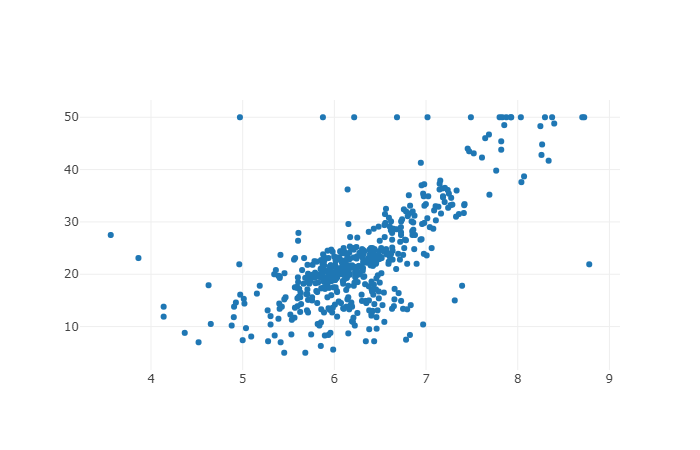

In [6]:
from IPython.display import Image #Use this to import images into jupyter
Image("images/RMvsPRICE.png")

From the above we can see that in general as the number of rooms increases so does the value of the house. Implying a linear relationship between the two variables

### Performing a linear regression

In [7]:
#Normalising the boston dataframe. 
#The purpose of this is to reduce all variables to the same scale
from sklearn import preprocessing
bos_new = bos
del bos_new['PRICE'] #Drop price variable from normalisation
val = bos_new.values
min_max_scaler = preprocessing.MinMaxScaler()
val_scaled = min_max_scaler.fit_transform(val)
bos_norm = pd.DataFrame(val_scaled,columns=bos.columns)
bos_norm.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


Once we have created our model we will need some to test it. This is where the idea of a training dataframe and a testing dataframe comes in. Train your model on one, test it on the other. Simple. 

As we only have one dataset of Boston housing data what we can do is use a sci-kitlearn package to randomly split the data into two



In [8]:
from sklearn.model_selection import train_test_split
X= pd.DataFrame(bos_norm['RM'],columns=['RM'])
y= target #This is the price column
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

Now that we have our training data let's fit our model 

In [9]:
from sklearn import linear_model
lr = linear_model.LinearRegression() 
lr.fit(X_train,y_train) #Fit the model on the training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
#Predict price on test data
predicted = lr.predict(X_test)
lr_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
lr_predictions[:20]

,Actual,Predicted
0,23.6,23.740350
1,32.4,26.795459
2,13.6,19.872333
3,22.8,20.604844
4,16.1,22.677315
5,20.0,22.516520
6,17.8,19.255951
7,14.0,21.578548
8,19.6,22.069867
9,16.8,20.265388


From the above we can see that at certain points the model is quite close to the actual values but sometimes quite far off. We can get the score and mean square error for our model as follows:

'The Mean Squared Error (MSE) is a measure of how close a fitted line is to data points. For every data point, you take the distance vertically from the point to the corresponding y value on the curve fit (the error), and square the value. Then you add up all those values for all data points, and, in the case of a linear fit, divide by the number of points minus two.** The squaring is done so negative values do not cancel positive values. The smaller the Mean Squared Error, the closer the fit is to the data. The MSE has the units squared of whatever is plotted on the vertical axis.' - [vernier](https://www.vernier.com/til/1014/)

In [11]:
#Actual vs predicted score
score = lr.score(X_test,y_test)
#Mean squared error
mseFull = np.mean((y_test - lr.predict(X_test))**2)

print("Accuracy of model: %f" % score)
print("Mean Squared Error: %f" % mseFull)

Accuracy of model: 0.594613
Mean Squared Error: 26.473346


In [12]:
def draw_graph(df,title):
    #Plot of linear regerssion
    trace = go.Scatter(x=df['Actual'].values,
                       y=df['Predicted'].values,
                       mode ='markers')
    
    trace2 = go.Scatter(x = df['Actual'].values,
                        y = df['Actual'].values,
                        mode = 'lines',
                        name = 'lines'
                        )

    layout = go.Layout(
        title="%s" % title,
        xaxis=dict(
            title='Actual',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        ),
        yaxis=dict(
            title='Predicted',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
    data = [trace,trace2]
    fig = go.Figure(data=data,layout=layout)
    return plt.iplot(fig)

Here I have created a python function as I will be plotting similar graphs later on

In [13]:
draw_graph(lr_predictions,'Linear Regression')

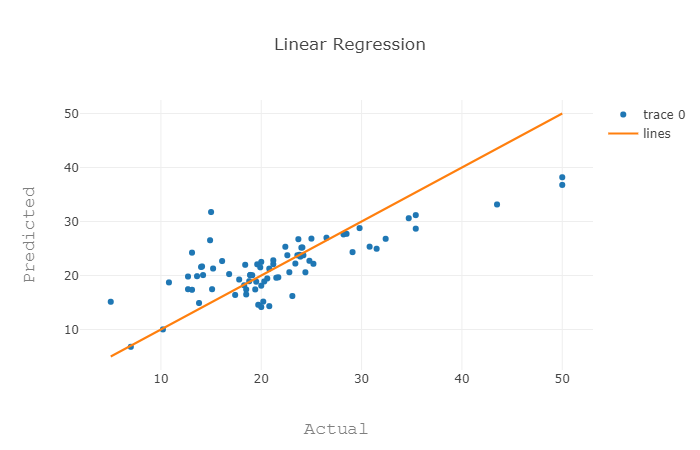

In [14]:
Image("images/LR.png")

As you can see our model only has an accuracy of 38%, not great. We are only using one variable to predict Price out of a possible 13 to predict the Price. In the next section we will look at using multiple variables in a linear regression in an effort to improve the model. The graph above is a scatter of the predicted vs actual. The closer to the line, the better our fit on the data

## Multiple Linear Regression

A multiple linear regression is used to predict a target variable Y using two or more independent variables X1,X2,X3...

As we have already created a normalised dataset of the entire boston set we can just reuse that here to create our training data for multiple variables


In [15]:
X= bos_norm
y= target #This is the price column
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [16]:
mlr = linear_model.LinearRegression() 
mlr.fit(X_train,y_train) #Fit the model on the training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
#Predict price on test data 
predicted = mlr.predict(X_test)
mlr_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
mlr_predictions[:20]

,Actual,Predicted
0,23.6,29.434253
1,32.4,36.135564
2,13.6,14.300537
3,22.8,24.865454
4,16.1,18.936624
5,20.0,23.336226
6,17.8,17.561542
7,14.0,13.639191
8,19.6,23.769703
9,16.8,20.669951


In [18]:
#Actual vs predicted score
score = mlr.score(X_test,y_test)
#Mean squared error
mseFull = np.mean((y_test - mlr.predict(X_test))**2)

print("Accuracy of model: %f" % score)
print("Mean Squared Error: %f" % mseFull)

Accuracy of model: 0.789701
Mean Squared Error: 13.733307


In [19]:
draw_graph(mlr_predictions,'Multiple Linear Regression')

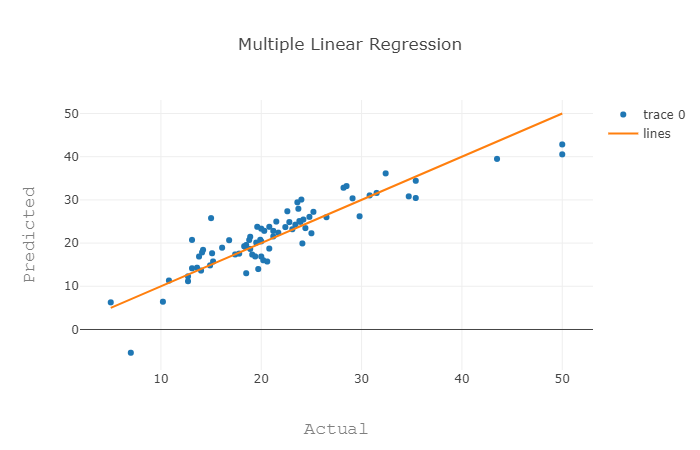

In [20]:
Image("images/MLR.png")

As you can see by adding multiple variables to our model we have almost doubled the accuracy. In the next section we will look at analysing the independent variables further to see if we can improve the model by removing certain ones from it, as so far we have only used one or all of them in the predictions

## Feature Selection


In machine learning and statistics, feature selection, also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features (variables, predictors) for use in model construction.

The central premise when using a feature selection technique is that the data contains many features that are either redundant or irrelevant, and can thus be removed without incurring much loss of information. Redundant or irrelevant features are two distinct notions, since one relevant feature may be redundant in the presence of another relevant feature with which it is strongly correlated. [wiki](https://en.wikipedia.org/wiki/Feature_selection)

In [1]:
from sklearn.feature_selection import SelectFromModel 

# This will throw out any variables that fall below this threshold
sfm = SelectFromModel(lr,threshold=0.10) 
sfm.fit(X_test,y_test)
n_features = sfm.transform(X_test).shape[1]


NameError: name 'lr' is not defined

In [ ]:
features = pd.DataFrame({'n_features':n_features,'score':score,'MSE':mseFull},index=[0])
while n_features > 1:
    sfm.threshold += 0.1
    X_transform = sfm.transform(X_test)
    n_features = X_transform.shape[1]
    lr.fit(X_transform,y_test)
    score = lr.score(X_transform,y_test)
    mseFull = np.mean((y_test - lr.predict(X_transform))**2)
    temp = pd.DataFrame({'n_features':n_features,'score':score,'MSE':mseFull},index=[0])
    features = features.append(temp)
    

group_features = features.groupby(features['n_features'],as_index=False).last()
group_features


I won't go into too much detail about the above but essentially what the while loop is doing is fitting a linear regression with variables of increasing importance on Y. As you can see from the table however we can see that the more variables we have the better the score and so there is no need to remove certain ones to improve our model

## Decision Tree Learning


Decision tree algorithims are used in a similar way to linear regression with the end goal to predict a target variable based off of the input of several other variables. Decision Trees are much better at predicting non-linear relationships and are also adaptable (classification or regression).

Decision trees are classed as a supervised learning algorithim and work by spliting nodes(independent variables) into subsets on the most significant input variable. Below is a diagram of a titanic decision tree classification. We will be using the regressor not the classification because the target variable we are trying to predict is continuous

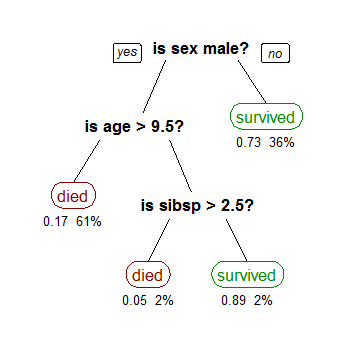

In [23]:
Image("images/titanic.png")

[link_to_image](https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png)

Divide & evaluate:

  - split into subsets
  - are they pure? (all yes or all no)
  - if yes: stop (i.e if only males died on the titanic the decision tree would     stop on that as the only necessary information would be gender)
  - if no: repeat (As this is obviously not the case the algorithim then goes on                    to other variables to evalulate, adding into its model that                      anyone who is male is 64% likely to have died)

In [120]:
#As we are predicting a continuous variable, we import the regressor
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state = 100,
                            max_depth=5, min_samples_leaf=5)

#I have set the above max_depth here to account for every variable


dtr.fit(X_train, y_train)


predicted = dtr.predict(X_test)

dtr_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})

dtr_predictions[:20]


,Actual,Predicted
0,23.6,21.070896
1,32.4,30.050000
2,13.6,16.823810
3,22.8,23.908571
4,16.1,16.823810
5,20.0,21.070896
6,17.8,18.589474
7,14.0,14.455556
8,19.6,21.070896
9,16.8,21.070896


In [121]:
#Model score 
score = dtr.score(X_test,y_test)
mseFull = np.mean((y_test - predicted)**2)

print("Accuracy of model: %f" % score)
print("Mean Squared Error: %f" % mseFull)

Accuracy of model: 0.864029
Mean Squared Error: 8.879419


In [122]:
draw_graph(dtr_predictions,'Decision Tree Regression')

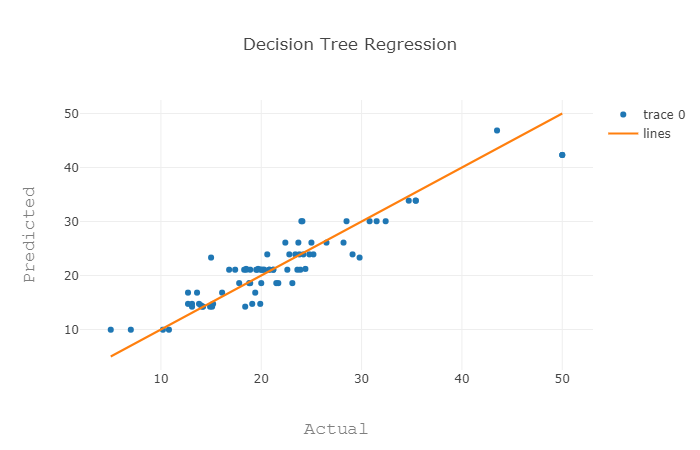

In [146]:
Image("images/DTR.png")

From the above we can see that a decision tree has done considerably better than both types of linear regression. This is without 'tuning' the model. Decision trees have many different hyper parameters one can set when using them but trying to improve the model by trial and error would take time. This is where grid search and cross validation come in

## Grid Search & Cross Validation

Grid Search in its simplest terms is used to run a model repeatedly each time with differing parameters specified by the user. Cross validation is used to subset the data to create a test in order to evaluate each of these with a score

In [123]:
from sklearn.model_selection import GridSearchCV

params ={'max_depth':[1,2,3,4,5,6,7,8],
         'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]
         }
grid_search = GridSearchCV(dtr,param_grid=params,cv=5)
grid_search.fit(X_train, y_train)


print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

predicted = grid_search.predict(X_test)

grid_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
score = grid_search.score(X_test,y_test)
print("predicted score against actual: %f" % score)
grid_predictions.head()


Best score: 0.8167652691302683
Best parameters: {'max_depth': 6, 'min_samples_leaf': 3}
predicted score against actual: 0.898348


,Actual,Predicted
0,23.6,20.844961
1,32.4,31.291667
2,13.6,16.823810
3,22.8,23.542857
4,16.1,16.823810


In [124]:
draw_graph(grid_predictions,'Decision Grid Search Regression')

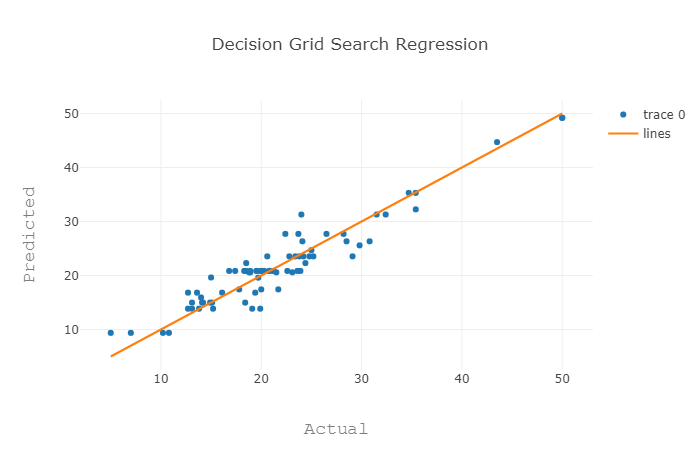

In [147]:
Image("images/DTR_GRID.png")

Here i have only varied both the max_depth and min_samples_leaf but already we can see that the model's accuracy has increased by 3%. There are many more parameters you could vary with grid search but it is worth noting that the more parameter variation you have the longer it will take to run as it will run every combination 

## Random Forest Model

A Random Forest as the name suggests is a collection of decision trees. It randomly subsets the data and feeds it into decision trees. This is particularly useful as decision trees are prone to overfitting (overfitting is an issue where the model is too closely matched on the training data and consequently gives bad predictions on the test data as it is not general enough).A random forest reduces this by running each decision tree on different subset of the data 

In [125]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 250, random_state = 100,oob_score=True,
                               max_depth=3, min_samples_leaf=5,n_jobs=-1)


rf.fit(X_train, y_train)
predicted = rf.predict(X_test)
rf_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
rf_score = rf.score(X_test,y_test)
print("predicted score against actual: %f" % rf_score)
rf_predictions.head()

predicted score against actual: 0.848783


,Actual,Predicted
0,23.6,23.142567
1,32.4,28.093789
2,13.6,15.516161
3,22.8,24.002485
4,16.1,15.412454


Grid search on random forest to tune model

In [126]:
params ={'n_estimators':[130,140,150],'max_depth':[10,11,12,13],
         'min_samples_leaf':[3,4,5,6]
         }
grid_search = GridSearchCV(rf,param_grid=params)
grid_search.fit(X_train, y_train)


print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

predicted = grid_search.predict(X_test)

grid_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
score = grid_search.score(X_test,y_test)
print("predicted score against actual: %f" % score)
grid_predictions.head()


Best score: 0.8249648203806896
Best parameters: {'max_depth': 12, 'min_samples_leaf': 3, 'n_estimators': 140}
predicted score against actual: 0.893745


,Actual,Predicted
0,23.6,22.997190
1,32.4,30.823742
2,13.6,16.529123
3,22.8,23.245938
4,16.1,16.978538


In [127]:
draw_graph(grid_predictions,'Random Forest Regression')

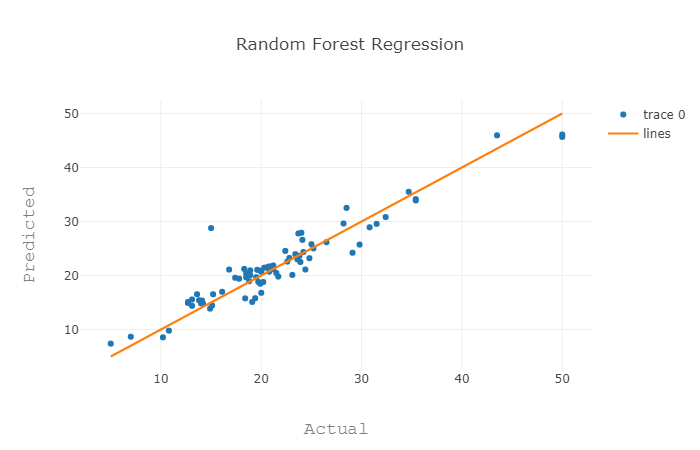

In [148]:
Image("images/RF_GRID.png")

From the above we can see that the random forest actually scores slightly lower on the test data, but scores higher on the grid_search score. The reason for this might be that the test data we are using just happens to fit that model better than the random forest and might be different for other data as the subset we are using is fairly small for testing

## Gradient Boosted Regression

Gradient boosted regression functions in a similar way to a random forest. The main difference between these are that a gradient boosted regression starts with a rough prediction and with each tree in the series after it trying to correct the prediction error. So for example at any instant t, the model outcomes are weighed based on the outcomes of previous isntant t-1. The outcomes predicted correctly are given a lower weight.

GBM parameters can generally be though of as 
 - Tree-Specific Parameters: These affect each individual tree in the model
 - Boosting Parameters: These affect the boosting operation of the model
 - Misc Parameters: Other parameters for overall functioning
 

In [128]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators= 15, random_state = 100,
                               max_depth=3, min_samples_leaf=5,learning_rate=0.2)


gbr.fit(X_train, y_train)
predicted = gbr.predict(X_test)
gbr_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
gbr_score = gbr.score(X_test,y_test)
print("predicted score against actual: %f" % gbr_score)
gbr_predictions.head()


predicted score against actual: 0.898410


,Actual,Predicted
0,23.6,23.116148
1,32.4,29.078630
2,13.6,16.753154
3,22.8,23.278058
4,16.1,16.734608


In [129]:
params ={'max_depth':range(1,10,2),
         'min_samples_split':range(50,200,50),
         'n_estimators':range(50,80,10),
         'learning_rate':[0.1,0.05]
         }
grid_search = GridSearchCV(gbr,param_grid=params)
grid_search.fit(X_train, y_train)


print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

predicted = grid_search.predict(X_test)

grid_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
score = grid_search.score(X_test,y_test)
print("predicted score against actual: %f" % score)
grid_predictions.head()

Best score: 0.8522559570386447
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 50, 'n_estimators': 70}
predicted score against actual: 0.932982


,Actual,Predicted
0,23.6,24.338496
1,32.4,31.228680
2,13.6,16.286739
3,22.8,22.305120
4,16.1,17.061458


In [130]:
draw_graph(grid_predictions,'Gradient Boosted Regression')

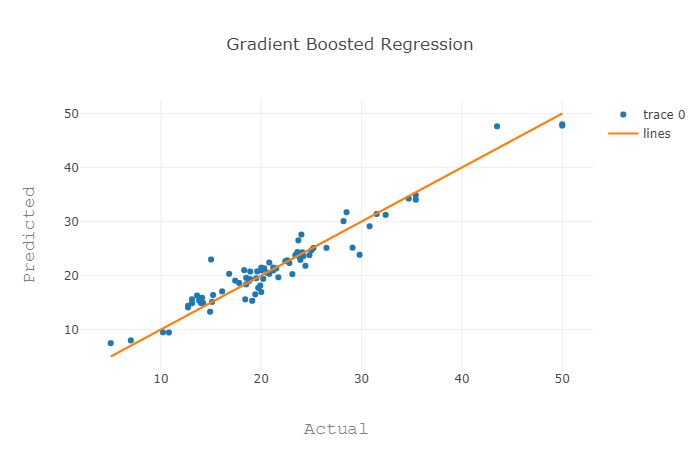

In [149]:
Image("images/GB_GRID.png")

From the scores we can see that the gradient boosted model by far performs the best, scoring a 93% accuracy rating on its predictions. I have spent some time tuning this model but as always finer tuning could be applied to improve it further. With these decision tree algorithims it always helps to read up on them as much as possible as the better you understand how they work the better you will be able to use them. I will include some links below that I have found particularly useful when putting this together

[gradient_boosting](https://www.analyticsvidhya.com/blog/2015/09/complete-guide-boosting-methods/)

[guide to tuning params of gradient boosting](https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/)

[7 types of regression techniques](https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/)